## Sentiment Analysis of IMDB Movie Reviews using Recurrent Neural Networks

### Abstract
#### This project uses Recurrent Neural Network (RNN) to perfrom Sentiment Analysis on Movie Reviews collected from IMDb. We used Keras to build a RNN model, after fine tuning the hyperparameters, model achieved 83.88% accuracy on test dataset. Based on some previous experiments, it is very likely that combining Convolutional Neural Network (CNN) with Recurrent Neural Network (RNN) could increase the test accuracy.

### Introduction
#### 1. IMDb is an online database of information related to world films, television programs, home videos and video games and internet streams. IMDb are very famous for authenticate movie ratings and reviews. <br><br>2. Our task is to build a model which will classify the movie reviews as either Positive or Negative. We are using Recurrent Neural Network (RNN) to learn patterns in a sentence. <br><br>3. Our approach is to tokenize the sentence and limit its length to a pre-defined value (100). Using Embedding layer with 50 dimensions, learn a filter and perform max pooling operation. Then use Feed Forward Neural Network with Dense layer and ReLU as activation function. Finally I used single unit output layer with sigmoid function to classify review as either positive or negative. 

In [1]:
#Imports
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding,GlobalMaxPooling1D
from keras.layers import LSTM
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
print('Defining Hyperparameters...')
max_features = 15000
maxlen = 100
batch_size = 100

embedding_dims = 50
epochs = 5

Defining Hyperparameters...


In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [4]:
print('Padding sequences...')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Padding sequences...


In [5]:
print('Define model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(maxlen,return_sequences=True))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Define model...


In [6]:
print('Build model...')
model.compile(loss='binary_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
performance = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Build model...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 153s 6ms/step - loss: 0.5723 - acc: 0.7102 - val_loss: 0.4387 - val_acc: 0.8110
Epoch 2/5
25000/25000 [==============================] - 240s 10ms/step - loss: 0.4213 - acc: 0.8372 - val_loss: 0.3951 - val_acc: 0.8273
Epoch 3/5
25000/25000 [==============================] - 291s 12ms/step - loss: 0.3603 - acc: 0.8682 - val_loss: 0.4311 - val_acc: 0.8224
Epoch 4/5
25000/25000 [==============================] - 285s 11ms/step - loss: 0.3269 - acc: 0.8865 - val_loss: 0.4048 - val_acc: 0.8266
Epoch 5/5
25000/25000 [==============================] - 279s 11ms/step - loss: 0.3022 - acc: 0.8970 - val_loss: 0.4164 - val_acc: 0.8239


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           750000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 20)           5680      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 10)           1240      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
__________

Text(0.5,1,'Train vs Validation Accuracy')

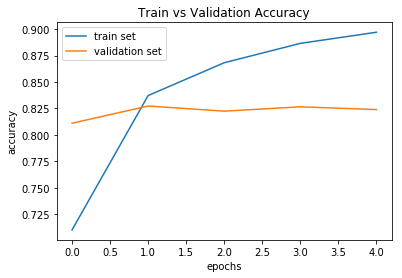

In [8]:
plt.plot(performance.history['acc'])
plt.plot(performance.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Accuracy')

Text(0.5,1,'Train vs Validation Loss')

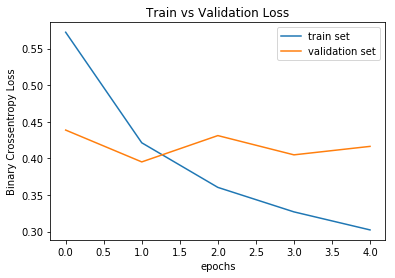

In [9]:
plt.plot(performance.history['loss'])
plt.plot(performance.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend(['train set', 'validation set'], loc='best')
plt.title('Train vs Validation Loss')